<a href="https://colab.research.google.com/github/sidhu2690/422/blob/main/05_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

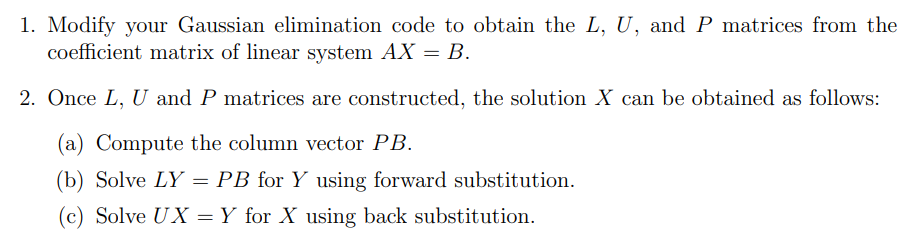

In [2]:
def forward_substitution(matrix):
  n = len(matrix)
  x = [0] * n
  for i in range(n):
    sum_known = 0
    for j in range(i):
      sum_known += matrix[i][j] * x[j]
    x[i] = (matrix[i][-1] -sum_known) / matrix[i][i]
  return x

def back_substitution(matrix):
  n = len(matrix)
  x = [0] * n
  for i in range(n-1, -1, -1):
    sum_known = 0
    for j in range(i+1, n):
      sum_known += matrix[i][j] * x[j]
    x[i] = (matrix[i][-1] - sum_known)/ matrix[i][i]
  return x

In [3]:
def lu_decomposition(matrix):
  A = np.array(matrix, dtype=float)
  n = len(matrix)
  P = np.eye(n)
  L = np.zeros((n, n))
  U = A.copy()

  for i in range(n):
    max_row = np.argmax(abs(U[i:, i])) + i

    if max_row != i:
      U[[max_row, i]] = U[[i, max_row]]
      P[[max_row, i]] = P[[i, max_row]]

      if i > 0:
        L[[i, max_row], :i] = L[[max_row, i], :i]

    for j in range(i+1, n):
      L[j, i] = U[j, i] / U[i, i]
      U[j] = U[j] - L[j, i] * U[i]

  for i in range(n):
    L[i, i] = 1

  return P, L, U

def solve_with_lu(A, B):
    P, L, U = lu_decomposition(A)
    B_perm = np.dot(P, B)
    y = forward_substitution(np.hstack([L, B_perm.reshape(-1,1)]))
    x = back_substitution(np.hstack([U, np.array(y).reshape(-1,1)]))
    return x, P, L, U

In [20]:
A = [[2, -1, -2],
     [-4, 6, 3],
     [-4, -2, 8]]

B = [ -2, 9, -5]

x, P, L, U = solve_with_lu(A, B)

np.allclose(np.dot(P, A), np.dot(L, U)), np.allclose(np.dot(A, x), B)

(True, True)

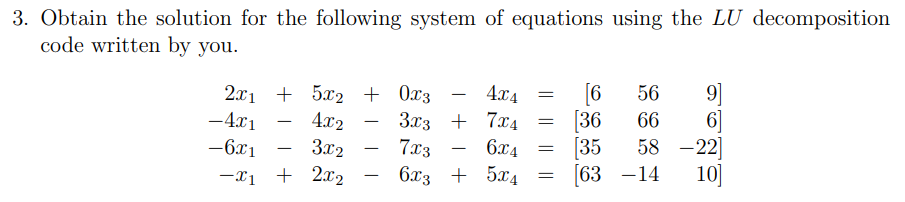

In [5]:
A = [[2, 5, 0, -4],
     [-4, -4,-3,7],
     [-6,-3,-7,-6],
     [-1, 2,-6, 5]]

B = [[6, 56, 9],
     [36, 66, 6],
     [35, 58, -22],
     [63, -14, 10]]

X = np.zeros_like(B, dtype=float)

for i, b in enumerate(np.array(B).T):
  x, _, _, _ = solve_with_lu(A, b)
  X[:, i] = x

print(X)


[[ -6.         -84.07581699  -5.84183007]
 [  6.          49.44836601   6.11633987]
 [ -5.          37.63921569   3.40784314]
 [  3.           5.77254902   2.4745098 ]]


In [6]:
np.linalg.solve(A, B)

array([[ -6.        , -84.07581699,  -5.84183007],
       [  6.        ,  49.44836601,   6.11633987],
       [ -5.        ,  37.63921569,   3.40784314],
       [  3.        ,   5.77254902,   2.4745098 ]])

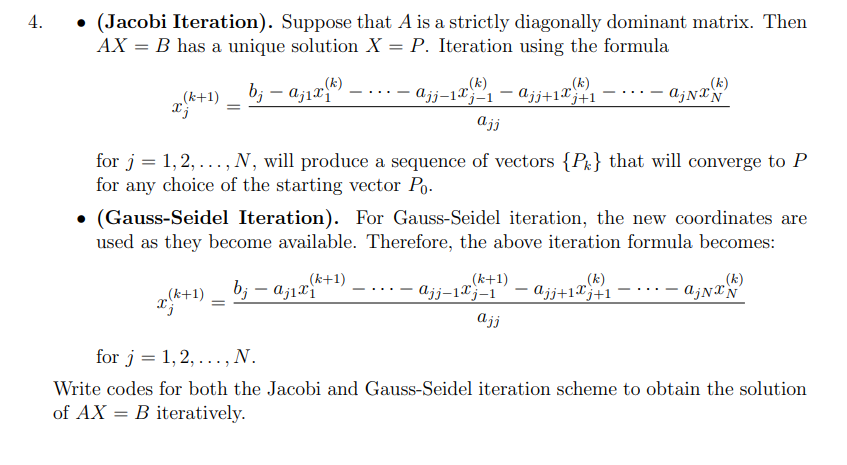

In [59]:
def jacobi_iteration(A, B, alpha=1e-10, n_iter=1000):
    # A X = B
    A = np.array(A, dtype=float)
    B = np.array(B, dtype=float)
    n = len(B)
    x_old = np.zeros(n)
    x_new = np.zeros(n)

    for iter in range(n_iter):
        for i in range(n):
            sum_others = 0
            for j in range(n):
                if j != i:
                    sum_others += A[i][j] * x_old[j]

            x_new[i] = (B[i] - sum_others) / A[i][i]

        if np.linalg.norm(x_new - x_old) < alpha:
            return x_new.tolist(), iter + 1

        x_old = x_new.copy()

    print("Did not converge")
    return x_new.tolist(), n_iter


In [60]:
A = [[2, -1, -2],
     [-4, 6, 3],
     [-4, -2, 8]]

B = [ -2, 9, -5]

x, iterations = jacobi_iteration(A, B)
print(f'Solution:{x} | Iterations:{iterations}')


Solution:[-1.8749999995316902, 0.9166666668419029, -1.3333333330136958] | Iterations:155


In [65]:
def gauss_seidel(A, B, alpha=1e-10, n_iter=1000):
    # A X = B
    A = np.array(A, dtype=float)
    B = np.array(B, dtype=float)
    n = len(B)
    x_old = np.zeros(n)

    for iter in range(n_iter):
        x_new = x_old.copy()
        for i in range(n):
            sum_others = 0
            for j in range(n):
                if j != i:
                    sum_others += A[i][j] * (x_new[j] if j < i else x_old[j])

            x_new[i] = (B[i] - sum_others) / A[i][i]

        if np.linalg.norm(x_new - x_old, ord=np.inf) < alpha:
            return x_new.tolist(), iter + 1

        x_old = x_new.copy()

    print("Did not converge")
    return x_new.tolist(), n_iter


In [66]:
A = [[2, -1, -2],
     [-4, 6, 3],
     [-4, -2, 8]]

B = [ -2, 9, -5]

x, iterations = gauss_seidel(A, B)
print(f'Solution:{x} | Iterations:{iterations}')


Solution:[-1.8749999997958626, 0.9166666667197952, -1.3333333332179826] | Iterations:60


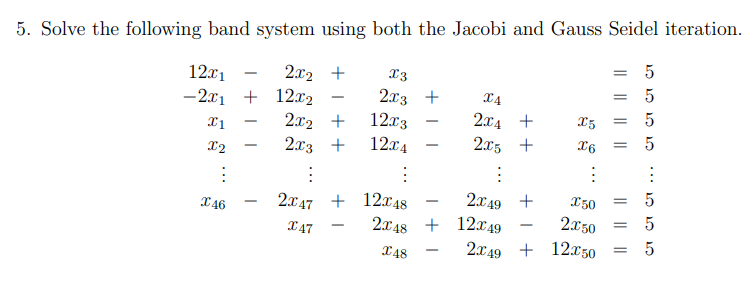

In [67]:
def build_band_matrix(n):
    A = np.zeros((n,n))
    for i in range(n):
        for eheh, hehe in [(-2, 1), (-1, -2), (0, 12), (1, -2), (2, 1)]:
            j = i + eheh
            if 0 <= j < n:
                A[i,j] = hehe
    return A

In [68]:
n = 50
A = build_band_matrix(n)
B = np.full(n, 5.0)
A, B

(array([[12., -2.,  1., ...,  0.,  0.,  0.],
        [-2., 12., -2., ...,  0.,  0.,  0.],
        [ 1., -2., 12., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., 12., -2.,  1.],
        [ 0.,  0.,  0., ..., -2., 12., -2.],
        [ 0.,  0.,  0., ...,  1., -2., 12.]]),
 array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
        5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
        5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.]))

In [70]:
x, iterations = jacobi_iteration(A, B)
print(f'Solution:{x}')
print(f'Iterations:{iterations}')

Solution:[0.46379552381548717, 0.5372846052017476, 0.5090229245988406, 0.49822163443922934, 0.4989418602362781, 0.4999853512518884, 0.5000887238862562, 0.5000153188499107, 0.49999479326326135, 0.4999978569169368, 0.5000001084220473, 0.5000002015794759, 0.5000000226085398, 0.49999998624059655, 0.499999995872316, 0.5000000005316277, 0.5000000004379941, 0.5000000000247379, 0.4999999999654204, 0.49999999999298966, 0.5000000000014378, 0.500000000001125, 0.4999999999998624, 0.49999999999999534, 0.49999999999996936, 0.4999999999999694, 0.49999999999999534, 0.4999999999998624, 0.500000000001125, 0.5000000000014378, 0.49999999999298966, 0.4999999999654204, 0.5000000000247379, 0.5000000004379941, 0.5000000005316277, 0.499999995872316, 0.49999998624059655, 0.5000000226085398, 0.5000002015794759, 0.5000001084220473, 0.4999978569169368, 0.49999479326326135, 0.5000153188499107, 0.5000887238862562, 0.4999853512518884, 0.4989418602362781, 0.49822163443922934, 0.5090229245988406, 0.5372846052017476, 0.

In [71]:
x, iterations = gauss_seidel(A, B)
print(f'Solution:{x}')
print(f'Iterations:{iterations}')

Solution:[0.46379552381655004, 0.5372846051999655, 0.5090229246013305, 0.4982216344361739, 0.4989418602397618, 0.49998535124813065, 0.5000887238901356, 0.5000153188460519, 0.4999947932669752, 0.4999978569134673, 0.5000001084251989, 0.5000002015766872, 0.500000022610945, 0.49999998623857217, 0.49999999587397886, 0.5000000005302937, 0.5000000004390389, 0.5000000000239385, 0.49999999996601696, 0.4999999999925555, 0.5000000000017443, 0.5000000000009168, 0.4999999999999947, 0.49999999999992895, 0.49999999999989425, 0.500000000000559, 0.49999999999809225, 0.5000000000035562, 0.49999999999714256, 0.5000000000023538, 0.4999999999961296, 0.499999999962681, 0.5000000000226551, 0.5000000004421847, 0.5000000005304155, 0.4999999958719193, 0.4999999862385942, 0.500000022612045, 0.5000002015767809, 0.5000001084247333, 0.49999785691334636, 0.4999947932671136, 0.50001531884612, 0.500088723890112, 0.4999853512481083, 0.4989418602397622, 0.49822163443617856, 0.5090229246013315, 0.5372846051999652, 0.4637

In [72]:
np.linalg.solve(A, B)

array([0.46379552, 0.53728461, 0.50902292, 0.49822163, 0.49894186,
       0.49998535, 0.50008872, 0.50001532, 0.49999479, 0.49999786,
       0.50000011, 0.5000002 , 0.50000002, 0.49999999, 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.49999999, 0.50000002, 0.5000002 , 0.50000011,
       0.49999786, 0.49999479, 0.50001532, 0.50008872, 0.49998535,
       0.49894186, 0.49822163, 0.50902292, 0.53728461, 0.46379552])